In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
train=pd.read_csv("train.csv")

In [200]:
train.shape

(54808, 14)

In [12]:
test=pd.read_csv("test.csv")

In [401]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
train.rename(columns={"KPIs_met >80%":"KPI_above_80","awards_won?":"awards_won"},inplace=True)

In [36]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPI_above_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [15]:
test.rename(columns={"KPIs_met >80%":"KPI_above_80","awards_won?":"awards_won"},inplace=True)

In [342]:
train.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [19]:
train.region.unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [20]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [21]:
train.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [22]:
train.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [23]:
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

In [25]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [37]:
train.KPI_above_80.value_counts()

0    35517
1    19291
Name: KPI_above_80, dtype: int64

In [39]:
train.avg_training_score.value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

In [145]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPI_above_80               0
awards_won                 0
avg_training_score         0
is_promoted                0
dtype: int64

In [98]:
train.education.value_counts()

Bachelor's          36669
Master's & above    14925
Null                 2409
Below Secondary       805
Name: education, dtype: int64

In [16]:
train.education.fillna("Null",inplace=True)

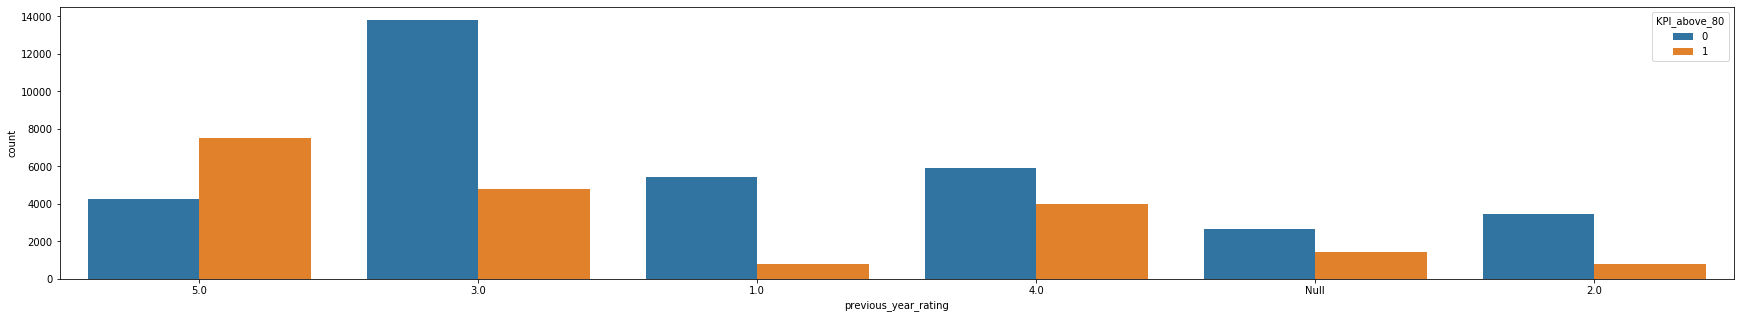

In [182]:
plt.figure(figsize = (30,5))
sns.countplot(x="previous_year_rating",hue="KPI_above_80",data=train)

In [195]:
train[train["KPI_above_80"]==1]["previous_year_rating"]

0        5
9        5
11       5
12       5
16       3
        ..
54794    4
54797    5
54798    5
54799    5
54805    5
Name: previous_year_rating, Length: 19291, dtype: object

In [174]:
train.avg_training_score.median()

60.0

In [161]:
train.previous_year_rating.value_counts()

3.0     18618
5.0     11741
4.0      9877
1.0      6223
2.0      4225
Null     4124
Name: previous_year_rating, dtype: int64

In [17]:
train.education.replace("Null",train.education.mode()[0],inplace=True)

In [141]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [345]:
train.education.value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [163]:
train.avg_training_score.value_counts()

50    2716
49    2681
48    2437
51    2347
60    2155
      ... 
98      37
99      35
41      26
40       5
39       2
Name: avg_training_score, Length: 61, dtype: int64

In [18]:
train.loc[(train.previous_year_rating.isnull())&(train.KPI_above_80==1),"previous_year_rating"]=5.0

In [19]:
train.loc[(train.previous_year_rating.isnull())&(train.KPI_above_80==0),"previous_year_rating"]=3.0

In [20]:
test.loc[(test.previous_year_rating.isnull())&(test.KPI_above_80==1),"previous_year_rating"]=5.0

In [21]:
test.loc[(test.previous_year_rating.isnull())&(test.KPI_above_80==0),"previous_year_rating"]=3.0

In [22]:
test.education.fillna(test.education.mode()[0],inplace=True)

In [23]:
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPI_above_80            0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [206]:
train1=train.drop(["gender","employee_id","recruitment_channel"],axis=1)

In [147]:
train1=pd.concat([train1,pca],axis=1)

In [149]:
train1

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPI_above_80,awards_won,avg_training_score,is_promoted,0
0,Sales & Marketing,region_7,Master's & above,1,35,5.0,8,1,0,49,0,-4.008878
1,Operations,region_22,Bachelor's,1,30,5.0,4,0,0,60,0,-0.191934
2,Sales & Marketing,region_19,Bachelor's,1,34,3.0,7,0,0,50,0,-14.087057
3,Sales & Marketing,region_23,Bachelor's,2,39,1.0,10,0,0,50,0,-11.085017
4,Technology,region_26,Bachelor's,1,45,3.0,2,0,0,73,0,-2.399471
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,1,48,3.0,17,0,0,78,0,NaN
54804,Operations,region_27,Master's & above,1,37,2.0,6,0,0,56,0,NaN
54805,Analytics,region_1,Bachelor's,1,27,5.0,3,1,0,79,0,NaN
54806,Sales & Marketing,region_9,Bachelor's,1,29,1.0,2,0,0,45,0,NaN


In [207]:
df=pd.get_dummies(train1,drop_first=True)

In [177]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_above_80,awards_won,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
X=df.drop(["is_promoted","education_Below Secondary"],axis=1)
y=df["is_promoted"]

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.69012928])

In [146]:
pca=pd.DataFrame(X_train)
pca1=pd.DataFrame(X_test)


In [132]:
pca1=pd.DataFrame(X_test)


In [378]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn import metrics

In [209]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [155]:
X_train

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_above_80,awards_won,avg_training_score,0,department_Finance,department_HR,...,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Master's & above
33286,1,30,5.0,1,1,0,59,19.664766,0,0,...,0,0,0,0,0,0,0,0,0,0
3688,1,54,3.0,5,0,0,64,-9.333853,0,0,...,0,0,0,0,0,0,1,0,0,1
48982,1,30,3.0,5,0,0,49,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
3014,1,31,5.0,3,0,0,52,-7.221779,0,1,...,0,0,0,0,0,0,0,0,0,0
35788,1,36,3.0,6,0,0,61,21.953965,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,1,33,5.0,4,0,0,48,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
52416,1,32,3.0,7,0,0,59,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
42613,1,27,3.0,3,1,0,49,21.557293,0,0,...,0,0,0,0,0,0,0,0,0,0
43567,1,31,5.0,6,1,0,79,-2.638270,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
import xgboost

In [220]:
clf=xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=6, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)


In [493]:
clf1=xgboost.XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=7, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [488]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ,0.50,0.75,1] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [215]:
random_search=RandomizedSearchCV(clf,param_distributions=param_test2b,n_iter=5,scoring='f1',n_jobs=-1,cv=5,verbose=3)


In [216]:
random_search.fit(X,y)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  9.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8],
                                        

In [131]:
X_train

array([[ -4.00887795],
       [ -0.19193397],
       [-14.08705747],
       ...,
       [-13.92982119],
       [ 15.8294356 ],
       [ 17.50989213]])

In [218]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [221]:
clf.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=2, subsample=0.8, tree_method=None,
              validate_parameters=False, verbosity=None)

In [ ]:
pred1=clf.predict(X_test)

In [223]:
print("XGB Classifier Accuracy",metrics.accuracy_score(pred1,y_test),'\n')
print(metrics.classification_report(y_test, pred1))

XGB Classifier Accuracy 0.9355044699872286 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10041
           1       0.69      0.42      0.53       921

    accuracy                           0.94     10962
   macro avg       0.82      0.70      0.75     10962
weighted avg       0.93      0.94      0.93     10962



In [224]:
test_df=test.drop(["employee_id","recruitment_channel","gender"],axis=1)

In [225]:
test1=pd.get_dummies(test_df,drop_first=True)

In [226]:
test_t=test1.drop(["education_Below Secondary"],axis=1)

In [227]:
pred1=clf.predict(test_t)


In [164]:
testX=pd.DataFrame(testX)

In [165]:
test_t=pd.concat([test_t,testX],axis=1)

In [166]:
test_t

,no_of_trainings,age,previous_year_rating,length_of_service,KPI_above_80,awards_won,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Master's & above,0
0,1,24,5.0,1,1,0,77,0,0,0,...,0,0,0,0,0,0,0,0,0,14.174169
1,1,31,3.0,5,0,0,51,0,1,0,...,0,0,1,0,0,0,0,0,0,-12.116703
2,1,31,1.0,4,0,0,47,0,0,0,...,0,0,0,0,0,0,0,0,0,-16.130813
3,3,31,2.0,9,0,0,65,0,0,0,...,0,0,0,0,0,0,0,0,0,1.818503
4,1,30,4.0,7,0,0,61,1,0,0,...,0,0,0,0,0,0,0,0,0,-2.113107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,1,24,3.0,1,0,0,61,0,0,1,...,0,0,0,0,0,0,0,0,0,-1.837591
23486,1,31,3.0,7,0,0,74,0,0,0,...,0,0,0,0,0,0,0,0,0,10.846500
23487,1,26,4.0,4,0,0,50,0,1,0,...,0,0,0,0,0,0,0,0,0,-12.931164
23488,3,27,3.0,1,0,0,70,0,0,0,...,0,0,0,0,0,0,0,0,0,7.064550


In [228]:
pred=pd.DataFrame(pred1)

In [229]:
sm=pd.read_csv("submit.csv")

In [230]:
submit=pd.concat([sm.employee_id,pred],axis=1)

In [231]:
submit.columns=["employee_id","is_promoted"]

In [232]:
submit.is_promoted

0        0
1        0
2        0
3        0
4        0
        ..
23485    0
23486    0
23487    0
23488    0
23489    1
Name: is_promoted, Length: 23490, dtype: int64

In [233]:
submit.is_promoted.value_counts()

0    22326
1     1164
Name: is_promoted, dtype: int64

In [234]:
submit.to_csv("Submission4.csv",index=False)